<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02142019_1%5D_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Example
A linear regression learning algorithm example using TensorFlow library.


*   Project: https://github.com/aymericdamien/TensorFlow-Examples


In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.080258459 W= 0.28175068 b= 0.5701309
Epoch: 0100 cost= 0.079878613 W= 0.27983803 b= 0.5838903
Epoch: 0150 cost= 0.079542786 W= 0.27803904 b= 0.5968316
Epoch: 0200 cost= 0.079245850 W= 0.27634713 b= 0.6090035
Epoch: 0250 cost= 0.078983344 W= 0.27475598 b= 0.6204502
Epoch: 0300 cost= 0.078751303 W= 0.2732596 b= 0.63121474
Epoch: 0350 cost= 0.078546152 W= 0.2718522 b= 0.64133966
Epoch: 0400 cost= 0.078364797 W= 0.27052858 b= 0.65086186
Epoch: 0450 cost= 0.078204520 W= 0.26928353 b= 0.6598179
Epoch: 0500 cost= 0.078062773 W= 0.26811266 b= 0.66824204
Epoch: 0550 cost= 0.077937521 W= 0.26701123 b= 0.6761651
Epoch: 0600 cost= 0.077826820 W= 0.2659753 b= 0.6836173
Epoch: 0650 cost= 0.077728942 W= 0.26500106 b= 0.6906261
Epoch: 0700 cost= 0.077642456 W= 0.2640847 b= 0.6972184
Epoch: 0750 cost= 0.077566035 W= 0.2632228 b= 0.7034188
Epoch: 0800 cost= 0.077498503 W= 0.26241213 b= 0.70925045
Epoch: 0850 cost= 0.077438839 W= 0.26164976 b= 0.71473557
Epoch: 0900 cost= 0.077386111 

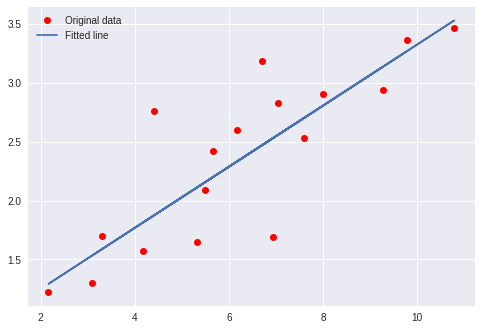

In [20]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))


    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()